## Import the Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

%matplotlib inline

## Import the Datasets

In [2]:
titanic_train = pd.read_csv('datasets/train.csv')
titanic_test = pd.read_csv('datasets/test.csv')

## Exploratory Data Analysis

In [3]:
# First 5 rows of the training dataset
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Shape of the training dataset
titanic_train.shape

(891, 12)

In [5]:
# Get some info about the training dataset
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# view some statistical details of the training dataset
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# check how many missing values each column have in training dataset
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Find out frequency of each value of Predictor variable - Survived  
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

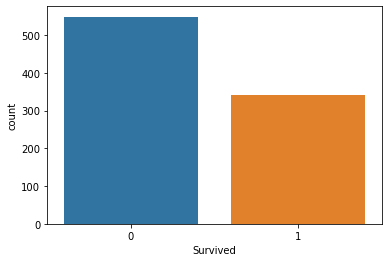

In [9]:
# Plot the frequency of each value of Predictor variable
sns.countplot(x='Survived', data=titanic_train)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

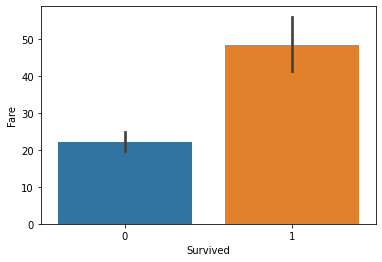

In [10]:
# Plot of survival vs fare price
sns.barplot(x='Survived', y='Fare', data=titanic_train)

In [11]:
# Number male and female passengers
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

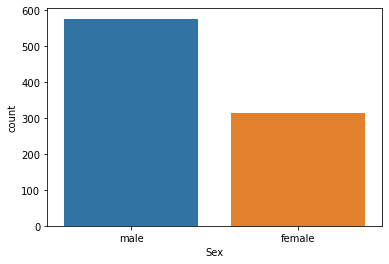

In [12]:
sns.countplot(x='Sex', data=titanic_train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

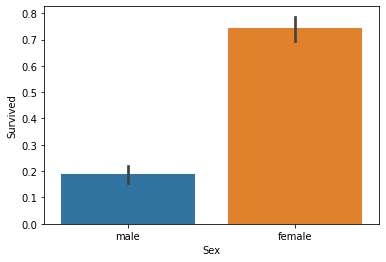

In [13]:
# Survival based on sex
sns.barplot(x='Sex', y='Survived', data=titanic_train)

In [14]:
# frequency of survival for females
titanic_train[titanic_train['Sex'] == 'female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [15]:
# frequency of survival for males
titanic_train[titanic_train['Sex'] == 'male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [16]:
# Number of Passengers on various Pclass
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

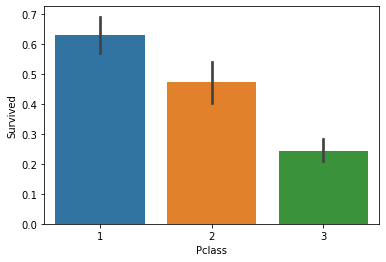

In [17]:
# Survival on the basis of Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic_train)

In [18]:
# Survival frequency for Pclass 1
titanic_train[titanic_train['Pclass'] == 1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [19]:
# Survival frequency for Pclass 2
titanic_train[titanic_train['Pclass'] == 2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [20]:
# Survival frequency for Pclass 3
titanic_train[titanic_train['Pclass'] == 3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

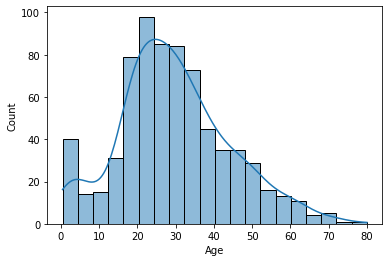

In [21]:
# Histogram plot of age
sns.histplot(data = titanic_train['Age'], kde = True)

In [22]:
# Checking correlation among various numerical variables
titanic_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

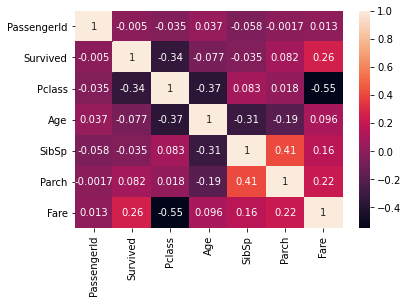

In [23]:
sns.heatmap(titanic_train.corr(), annot=True)

## Data Cleaning

In [26]:
# Since cabin has most entires as null, we will drop it
titanic_train.drop('Cabin', axis=1, inplace=True)

In [29]:
# impute the missing age values with the mean 
titanic_train['Age'].fillna(value=titanic_train['Age'].mean(), inplace=True)

In [32]:
# drop the observations having missing Embarked (as only 2 of them are missing)
titanic_train.dropna(axis=0, inplace=True)

## Feature engineering

In [36]:
# Passenger id, Name, ticket number won't help the model, so we should drop them
titanic_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [37]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
# Seperate the predictor variables and the target variable
X = titanic_train.iloc[:, 1:].values
y = titanic_train.iloc[:, :1].values

In [58]:
# Encoding the Sex variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = columnTransformer.fit_transform(x)

In [60]:
# Encoding the Emberked variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = columnTransformer.fit_transform(x)

In [61]:
X.shape

(889, 9)

In [62]:
y.shape

(889, 1)